In [1]:
import os
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests

## Get metadata

In [2]:
fname = 'faceexp-comparison-data-train-public.csv'
df = pd.read_csv(fname, low_memory=False)
df.head()

image_1      x1_1      x2_1  \
0  http://farm5.staticflickr.com/4108/5185055338_...  0.142578  0.266602   
1  http://farm5.staticflickr.com/4108/5185055338_...  0.142578  0.266602   
2  http://farm5.staticflickr.com/4108/5185055338_...  0.142578  0.266602   
3  http://farm5.staticflickr.com/4108/5185055338_...  0.718750  0.826172   
4  http://farm5.staticflickr.com/4108/5185055338_...  0.718750  0.826172   

       y1_1      y2_1                                            image_2  \
0  0.065421  0.297508  http://farm3.staticflickr.com/2127/5765052001_...   
1  0.065421  0.297508  http://farm4.staticflickr.com/3543/3387356856_...   
2  0.065421  0.297508  http://farm4.staticflickr.com/3858/14540292875...   
3  0.194704  0.394081  http://farm4.staticflickr.com/3875/14501588548...   
4  0.194704  0.394081  http://farm6.staticflickr.com/5143/5693754914_...   

       x1_2      x2_2      y1_2      y2_2  ... id7  s7  id8  s8  id9  s9  \
0  0.439490  0.596178  0.289062  0.427734  ... NaN NaN  NaN NaN  NaN NaN   
1  0.335938  0.441406  0.130307  0.311859  ... NaN NaN  NaN NaN  NaN NaN   
2  0.206442  0.524158  0.078125  0.325195  ... NaN NaN  NaN NaN  NaN NaN   
3  0.318665  0.488619  0.162109  0.290039  ... NaN NaN  NaN NaN  NaN NaN   
4  0.244141  0.380859  0.175000  0.413235  ... NaN NaN  NaN NaN  NaN NaN   

   id10  s10  id11  s11  
0   NaN  NaN   NaN  NaN  
1   NaN  NaN   NaN  NaN  
2   NaN  NaN   NaN  NaN  
3   NaN  NaN   NaN  NaN  
4   NaN  NaN   NaN  NaN  

[5 rows x 38 columns]

## Look at a face

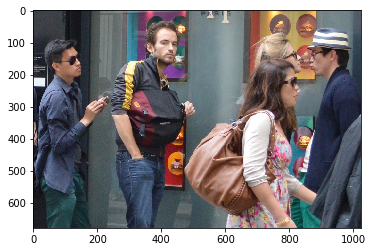

In [3]:
row = df.iloc[0]
url = row.image_3
r = requests.get(url)
im = Image.open(io.BytesIO(r.content))
plt.imshow(im);

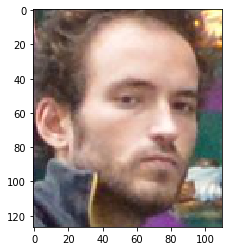

In [4]:
left = row.x1_3 * im.width
right = row.x2_3 * im.width
upper = row.y1_3 * im.height
lower = row.y2_3 * im.height
box = [left, upper, right, lower]
face = im.crop(box)
plt.imshow(face);

## Verify that the last part of each URL is unique

In [5]:
fns = pd.concat([df.image_1, df.image_2, df.image_3], ignore_index=True)
fns

0          http://farm5.staticflickr.com/4108/5185055338_...
1          http://farm5.staticflickr.com/4108/5185055338_...
2          http://farm5.staticflickr.com/4108/5185055338_...
3          http://farm5.staticflickr.com/4108/5185055338_...
4          http://farm5.staticflickr.com/4108/5185055338_...
                                 ...                        
1347424    http://farm8.staticflickr.com/7302/9738428783_...
1347425    http://farm7.staticflickr.com/6165/6195618139_...
1347426    http://farm4.staticflickr.com/3799/10831866865...
1347427    http://farm4.staticflickr.com/3007/3059129754_...
1347428    http://farm4.staticflickr.com/3034/2722302890_...
Length: 1347429, dtype: object

In [6]:
splts = fns.str.split('/', expand=True)
splts

0 1                        2     3                             4
0        http:     farm5.staticflickr.com  4108   5185055338_1dec873bf3_b.jpg
1        http:     farm5.staticflickr.com  4108   5185055338_1dec873bf3_b.jpg
2        http:     farm5.staticflickr.com  4108   5185055338_1dec873bf3_b.jpg
3        http:     farm5.staticflickr.com  4108   5185055338_1dec873bf3_b.jpg
4        http:     farm5.staticflickr.com  4108   5185055338_1dec873bf3_b.jpg
...        ... ..                     ...   ...                           ...
1347424  http:     farm8.staticflickr.com  7302   9738428783_74a4cfd76a_b.jpg
1347425  http:     farm7.staticflickr.com  6165   6195618139_c474e487b9_b.jpg
1347426  http:     farm4.staticflickr.com  3799  10831866865_a299175cb9_b.jpg
1347427  http:     farm4.staticflickr.com  3007   3059129754_0748fb7497_b.jpg
1347428  http:     farm4.staticflickr.com  3034   2722302890_9ea1aa7213_z.jpg

[1347429 rows x 5 columns]

In [7]:
(splts[4].duplicated() == fns.duplicated()).all()

True

## Save all faces as images

NOTE: FEC paper says that preprocessing includes alignment, which consists of rotating to undo roll and scaling to get inter-ocular distance of 55 pixels. It also suggests using a face detector to make sure the image downloaded correctly. Adding these steps may improve performance.

In [8]:
ims1 = df[['']]

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

## Save new metadata

ModuleNotFoundError: No module named 'dlib'